# **Bank Loan Approval System**

### Building a model that will predict the likelihood of a customer buying personal loan 

In [1]:
#import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Dropout
from tensorflow.keras.utils import to_categorical

In [3]:
bank_df = pd.read_csv("/content/UniversalBank.csv")

In [4]:
bank_df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [5]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [6]:
bank_df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [7]:
bank_df['Personal Loan'].value_counts()

0    4520
1     480
Name: Personal Loan, dtype: int64

In [8]:
bank_df['Mortgage'].value_counts()

0      3462
98       17
103      16
119      16
83       16
       ... 
541       1
509       1
505       1
485       1
577       1
Name: Mortgage, Length: 347, dtype: int64

In [9]:
bank_df.drop(['ID','ZIP Code'],axis=1,inplace=True)

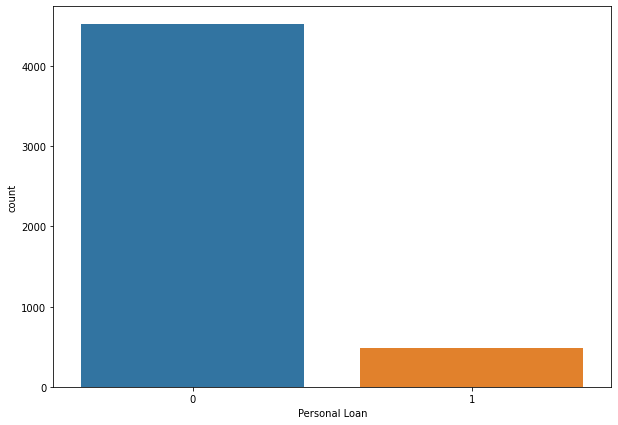

In [10]:
plt.figure(figsize=(10,7))
sns.countplot(bank_df['Personal Loan'])

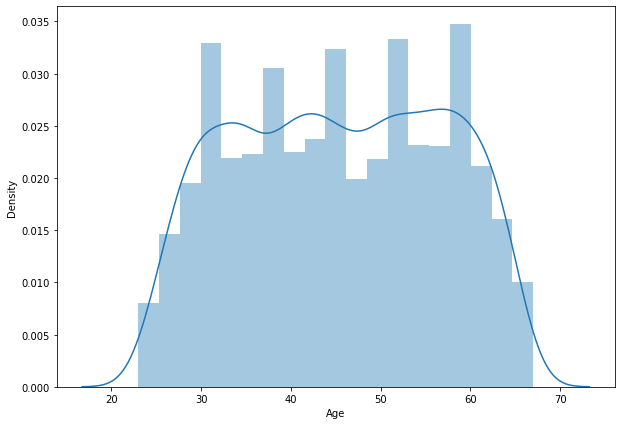

In [11]:
plt.figure(figsize=(10,7))
sns.distplot(bank_df['Age'])

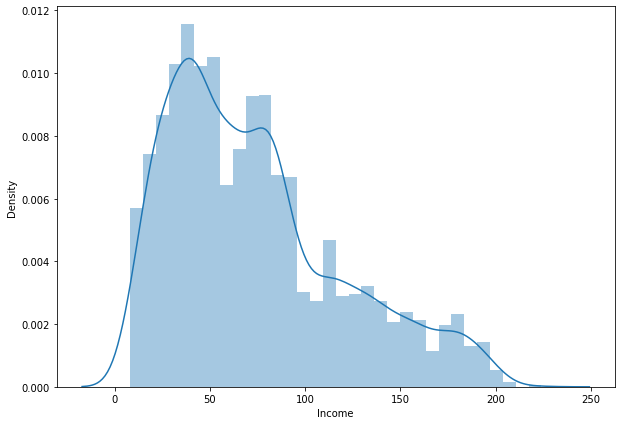

In [12]:
plt.figure(figsize=(10,7))
sns.distplot(bank_df['Income'])

In [13]:
personal_loans = bank_df[bank_df['Personal Loan'] == 1]
no_personal_loan = bank_df[bank_df['Personal Loan'] == 0]

In [14]:
personal_loans.describe()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.0,480.000000,480.000000,480.00000,480.000000
mean,45.066667,19.843750,144.745833,2.612500,3.905354,2.233333,100.845833,1.0,0.125000,0.291667,0.60625,0.297917
std,11.590964,11.582443,31.584429,1.115393,2.097681,0.753373,160.847862,0.0,0.331064,0.455004,0.48909,0.457820
min,26.000000,0.000000,60.000000,1.000000,0.000000,1.000000,0.000000,1.0,0.000000,0.000000,0.00000,0.000000
25%,35.000000,9.000000,122.000000,2.000000,2.600000,2.000000,0.000000,1.0,0.000000,0.000000,0.00000,0.000000
50%,45.000000,20.000000,142.500000,3.000000,3.800000,2.000000,0.000000,1.0,0.000000,0.000000,1.00000,0.000000
75%,55.000000,30.000000,172.000000,4.000000,5.347500,3.000000,192.500000,1.0,0.000000,1.000000,1.00000,1.000000
max,65.000000,41.000000,203.000000,4.000000,10.000000,3.000000,617.000000,1.0,1.000000,1.000000,1.00000,1.000000


In [15]:
# Avg Income of people who took loan is around $144K

In [16]:
no_personal_loan.describe()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,4520.000000,4520.000000,4520.000000,4520.000000,4520.000000,4520.000000,4520.000000,4520.0,4520.000000,4520.000000,4520.000000,4520.000000
mean,45.367257,20.132301,66.237389,2.373451,1.729009,1.843584,51.789381,0.0,0.102212,0.035841,0.595796,0.293584
std,11.450427,11.456672,40.578534,1.148771,1.567647,0.839975,92.038931,0.0,0.302961,0.185913,0.490792,0.455454
min,23.000000,-3.000000,8.000000,1.000000,0.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,35.000000,10.000000,35.000000,1.000000,0.600000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
50%,45.000000,20.000000,59.000000,2.000000,1.400000,2.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000
75%,55.000000,30.000000,84.000000,3.000000,2.300000,3.000000,98.000000,0.0,0.000000,0.000000,1.000000,1.000000
max,67.000000,43.000000,224.000000,4.000000,8.800000,3.000000,635.000000,0.0,1.000000,1.000000,1.000000,1.000000


In [17]:
# Avg Income of people who did not took loan is around $66K

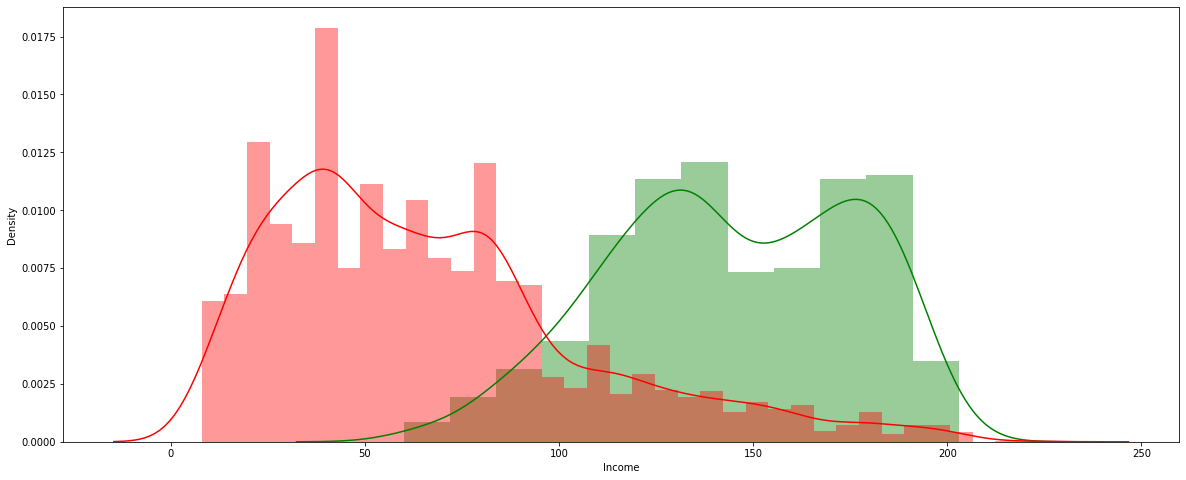

In [18]:
plt.figure(figsize=(20,8))
sns.distplot(personal_loans['Income'], color='g')
sns.distplot(no_personal_loan['Income'], color='r')

In [19]:
X = bank_df.drop('Personal Loan', axis=1)
y = bank_df['Personal Loan']

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [22]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4000, 11), (1000, 11), (4000,), (1000,))

In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
scaler = StandardScaler()

In [25]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [26]:
model = Sequential()

model.add(InputLayer(input_shape=11))

model.add(Dense(250, activation='relu'))

model.add(Dense(500, activation='relu'))

model.add(Dropout(0.3))

model.add(Dense(500, activation='relu'))

model.add(Dropout(0.4))

model.add(Dense(500, activation='relu'))

model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 250)               3000      
_________________________________________________________________
dense_1 (Dense)              (None, 500)               125500    
_________________________________________________________________
dropout (Dropout)            (None, 500)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 500)               250500    
_________________________________________________________________
dropout_1 (Dropout)          (None, 500)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 500)               250500    
_________________________________________________________________
dropout_2 (Dropout)          (None, 500)               0

In [27]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [28]:
history = model.fit(X_train, y_train, epochs=20, validation_split=0.2, verbose=1)

Epoch 1/20
100/100 [==============================] - 2s 6ms/step - loss: 0.1727 - accuracy: 0.9375 - val_loss: 0.0961 - val_accuracy: 0.9638
Epoch 2/20
100/100 [==============================] - 0s 4ms/step - loss: 0.0858 - accuracy: 0.9684 - val_loss: 0.0909 - val_accuracy: 0.9613
Epoch 3/20
100/100 [==============================] - 0s 4ms/step - loss: 0.0668 - accuracy: 0.9762 - val_loss: 0.0846 - val_accuracy: 0.9700
Epoch 4/20
100/100 [==============================] - 0s 4ms/step - loss: 0.0651 - accuracy: 0.9803 - val_loss: 0.0838 - val_accuracy: 0.9625
Epoch 5/20
100/100 [==============================] - 0s 4ms/step - loss: 0.0532 - accuracy: 0.9800 - val_loss: 0.0618 - val_accuracy: 0.9762
Epoch 6/20
100/100 [==============================] - 0s 4ms/step - loss: 0.0583 - accuracy: 0.9806 - val_loss: 0.0756 - val_accuracy: 0.9650
Epoch 7/20
100/100 [==============================] - 0s 4ms/step - loss: 0.0484 - accuracy: 0.9850 - val_loss: 0.0596 - val_accuracy: 0.9812
Epoch 

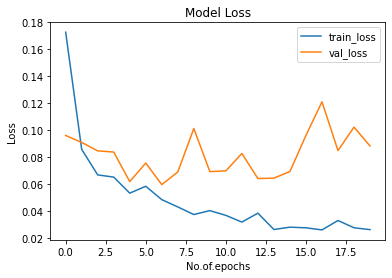

In [29]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model Loss")
plt.xlabel("No.of.epochs")
plt.ylabel("Loss")
plt.legend(['train_loss', 'val_loss'], loc='upper right')
plt.show()

In [30]:
y_pred = model.predict(X_test)

In [31]:
# Get the acccuracy of the model
result = model.evaluate(X_test, y_test)

print("Accuracy : {}".format(result[1]))

32/32 [==============================] - 0s 3ms/step - loss: 0.0946 - accuracy: 0.9750
Accuracy : 0.9750000238418579


In [34]:
y_pred = (y_pred > 0.5)

In [48]:
from sklearn.metrics import confusion_matrix, classification_report

In [36]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[892,  12],
       [ 13,  83]])

In [49]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       904
           1       0.87      0.86      0.87        96

    accuracy                           0.97      1000
   macro avg       0.93      0.93      0.93      1000
weighted avg       0.97      0.97      0.97      1000



***Saving the Model***

In [ ]:
model.save("Bank_Loan_model.h5")

***Loading the pre-trained Model***

In [13]:
from keras.models import load_model

In [17]:
model = load_model("/content/Bank_Loan_model.h5")

In [ ]:
#Predicting on new user single data

In [44]:
x = scaler.transform(np.array([[22,5,50,2,2.10,2,0,0,0,0,0]]))

In [45]:
new_pred = model.predict(x)

In [46]:
new_pred = (new_pred > 0.5)

In [47]:
if new_pred == True:
  print("Loan Candidate")
else:
  print("No Loan")

No Loan
